# Patterns of fluid intelligence
### Are patterns of voxel activation during working memory and cognitive control tasks similarly informative of high or low fluid intelligence?

Hidde Pielage, Jolien Schuurmans, University of Amsterdam, Pattern Analysis 2017

<div class='alert alert-info'>
**General feedback**: Well done, Jolien & Hidde! It's clear from your report that you thought about the analysis and you understand the implications of different analysis steps/(hyper)parameters. Next time, though, don't forget to standardize your features! Also, I liked your intro and discussion: to the point and supported your hypotheses.

<br><br>
Argumentation analysis (10%): 8<br><br>
Embedding in literature (5%): 9<br><br>
Implementation analysis (55%): 7.5<br><br>
Clarity (30%): 9<br><br>
Total: 8.1
</div>




## Abstract 
To investigate the question 'Are patterns for cognitive control, and patterns of a working memory task similar, and informative enough to predict a high or low score on a test for fluid intelligence?', we used the functional data of the PIOP MRI dataset. We used a decoding (machine learning) analysis to decode high/low fluid intelligence (Raven's Progressive Matrices test score) from working memory data, and tested if this algorithm also worked to decode fluid intelligence from cognitive control data (Stroop task). The results indicate that the algorithm is not able to significantly predict high of low fluid intelligence above chance level from both the working memory data and the cognitive control task. 

<div class='alert alert-info'>
**Feedback**: Clear and concise! 
</div>

## Introduction
Current literature describes how constructs like working memory (WM) capacity, general fluid intelligence and prefrontal cortex functions (e.g. cognitive control and executive/selective attention) seem to be connected (Kane & Engle, 2002; Conway, Cowan, Bunting, Therriault & Minkoff, 2002; Engle, Tuholski, Laughlin & Conway, 1999; Fry & Hale, 1996). It seems that, by training WM, not only the g factor of intelligence, but also fluid intelligence can be improved (Jaeggi, Buschkuehl, Jonides & Perrig, 2008). Training WM significantly improved performance on the fluid intelligence (as tested by Raven's Progressive Matrices task), and on other tasks related to prefrontal functioning (Klingberg, Frossberg & Westerberg, 2002). Kane, Hambrick and Conway (2005) describe that WM capacity and fluid intelligence are strongly connected and executive attention processes mediate this association. Conway et al. (2002) even state that WM capacity is a good predictor of general fluid intelligence. And Kane and Engle (2003) found that individual differences in WM capacity could predict performance on the Stroop Task.

To check whether these statements hold, we tested if patterns of brain activity recorded during a working memory task would be predictive of performance on a fluid intelligence task. Additionally, to check the connections between prefrontal functions (e.g. cognitive control/selective attention) and WM, we also tested if patterns of activity during the Stroop task yield similar patterns which are similarly predictive of fluid intelligence.

### Are patterns for selective attention/cognitive controle (Stroop task) and patterns of a working memory task similar, and informative, enough to predict a high or a low score on a test for fluid intelligence (Raven's Progressive Matrices test)?

A machine learning approach was used to check if the brain activation from both wm and cognitive control tasks yield similar patterns. Similar results could not be achieved by a univariate analysis because it does not allow to accurately compare the activation of both tasks to each other. Arguably RSA could also have been used for this question by correlating the dissimilarity spaces of brain activation during both tasks. However, the cross-validation paradigm is more straightforward in detecting a difference of categories. No information about how the categories differ is required, which makes RSA redundant.

<div class='alert alert-info'>
**Feedback**: Again, I like the conciseness. Well argued. Also, with regard to using RSA to show 'informational overlap': correlating RSDs between the two tasks may capitalize on similar noise sources (the problem that arose in Hanneke's and Lauren's project).
</div>

# Current study
If the current literature is right, and WM capacity, general fluid intelligence and cognitive control are connected, it should be possible to decode high or low fluid intelligence from a cognitive control task, using an algorithm that was trained on data of a wm task. We expect both patterns to be informative enough to predict a high or a low score on the Raven's Progressive Matrices Task with an accuracy above chance level.

# Methods

## Experimental stimuli and procedure

248 participants participated in a MRI study and performed different tasks in and out of the MRI. For the current study we used the fMRI data from the 'Working Memory Task', 'Gender Stroop Task' and the 'Raven's Progressive Matrices'. These tasks are shortly described below.

* **Working Memory:**
Participants performed two types of trials: 32 working memory trials ("active") and 8 control trials ("passive"). Working memory trials consisted of a fixation cross (1s), sample visual display (0.5s), delay period (4s or 6s), and a probe display (0.5s). Sample visual displays consisted of eight oriented white bars on a gray background. The probe display consisted of a single bar in the location of one of the eight sample bars. Participants were instructed to remember the orientation of all sample bars, and decide whether or not the orientation of the probe bar matched the orientation of the sample bar that was previously shown at the same location. Orientations of the sample and probe bar matched in half of the working memory trials.Control trials consisted of a fixati on cross (1s), followed by a short change in luminance.
Trial order and delay periods were optimized to maximize BOLD-response shape estimation efficiency. Furthermore, 18 null events were interspersed between working memory and control trials. Trial order was identical for all participants. *Active > passive*


* **Gender Stroop:**
Participants are shortly (500ms) presented with a picture of a face superimposed with a gender-related distractor word (‘male’ or ‘female’). Participants are instructed to decide the gender of the pictured face, ignoring the distractor word. Distractor words can either be congruent or incongruent with the gender of the face shown in the picture. *Congruent > incongruent*


* **Raven's Progressive Matrices:** Participants where shown X trials with a Raven's matrix. Each matrix has the same (3 x 3) format in which the bottom right entry is missing, and must be selected from 8 alternatives. Participants had to pick the right answer and had 20 minutes time to finish the task. The score was based on the correct answers, mediated by the time it took the participant.

## Data representation

For this decoding analysis, we used t-statistics from certain contrasts of both the working memory and Stroop task as a measure of voxel activation. t-statistics were used, because they provide a standardized measure of voxel activation per subject within a contrast.

The active versus passive contrast of the working memory task was used so that activation patterns of voxels activation would be informative about the use of working memory (active condition) versus when it is not used as much (passive condition). A similar contrast, namely incongruent versus congruent trials, on the Stroop task will be informative about voxels that are more active when cognitive control is necessary versus when it is not. This way, similar contrasts were used to represent the processes that are associated with high or low intelligence.

To test whether the patterns of activation related to working memory and cognitive control are similarly informative about high or low intelligence, a between-subjects cross-validation analyses was used. The working memory active x passive contrast is used to train an algorithm to predict high or low intelligence of subjects. This algorithm will be used to test whether it is able to decode high or low intelligence on both the working memory (active x passive) contrast as well as the Stroop task (congruent x incongruent) contrast.

In [28]:
#Import stuff
import os.path as op
from glob import glob
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

Below we create a custom class for loading fMRI data of multiple subjects.

In [29]:
class Mvp():
    """ Custom class to load multivoxel MRI data from multiple subjects.
    
    Parameter
    ---------
    paths: list
        A list containing paths to subject data that are to be loaded.
    
    Attributes
    ----------
    X : numpy-array
        Array of shape [n_samples, n_voxels]"""
    
    def __init__(self, paths):
        
        self.paths = paths
        
    def load(self):
        """ This method loads the data and flattens it. All data after flattening is stored in a
        n_samples by n_voxels matrix, where every sample represents a subject. """
        
        load_it = nib.load(self.paths[1])
        data_for_dim = load_it.get_data()
        voxel_dims = np.size(data_for_dim)
        X = np.zeros((len(self.paths), np.prod(voxel_dims)))

        for i, path in enumerate(self.paths):
    
            X[i, :] = nib.load(path).get_data().ravel()
        
        self.X = X

Now, we will define which paths are to be loaded, using the glob function. Additionally, we load behavioral data which will be used as a categorical dependent variable. Subjects who did not finish the Raven's progressive matrices test will be removed from this variable.


In [30]:
#Define paths
#Use glob function to load data from every subject
WMpaths = glob('/home/Public/FirstLevel_piop/pi*/*-WIPpiopwm.feat/stats/tstat3.nii.gz')
WMpaths = sorted(WMpaths)
STRpaths = glob('/home/Public/FirstLevel_piop/pi*/*-WIPpiopgstroop.feat/stats/tstat3.nii.gz')
STRpaths = sorted(STRpaths)

#Load behavioral data
path_to_behav = '/home/Public/FirstLevel_piop/PIOP_BEHAV_NIPA.tsv' #Define path to csv file
df = pd.read_csv(path_to_behav, sep='\t', index_col=0) #Create dataframe using pandas
df = df.dropna(subset=['Raven_raw']) #Remove subject if raven score is not available
y = df['Raven_raw'] #Split the raven score from the dataframe

Next, we make sure all subjects who are to be included in the analyses have finished both the working memory and the Stroop task. By creating data frames, we can strip the paths of subjects who have completed both. The same relevant subjects will be extracted from the Raven's score dependent variable (y). Finally, the y variable is made categorical, this is done by a median split. Subjects above the median will be categorized as having high intelligence (indicated with a 1) et vice versa.

In [31]:
#Check which subjects completed both the working memory and stroop task. Subject names are split from paths to data
#to check wether they have done the task or not.
WMsubnames = [path.split('/')[4] for path in WMpaths] #Subjects who completed working memory
STRsubnames = [path.split('/')[4] for path in STRpaths] #Subjects who completed stroop task
relevant_subjects = list(set(WMsubnames) & set(STRsubnames)) #Subjects who are in both lists, and thus 
                                                             #completed both wm and stroop

WMlist = pd.DataFrame(np.column_stack((WMsubnames, WMpaths))) #Make dataframe for selection paths for working memory task
WMlist.set_index(0, inplace=True) #Use first column as index so subject names are linked to paths to files
STRlist = pd.DataFrame(np.column_stack((STRsubnames, STRpaths))) #Same here for stroop task
STRlist.set_index(0, inplace=True)

#Select relevant paths
WMpaths = WMlist.loc[relevant_subjects] #Select relevant wm paths
WMpaths = sorted(WMpaths[1].tolist())
STRpaths = STRlist.loc[relevant_subjects] #Select relevant stroop paths
STRpaths = sorted(STRpaths[1].tolist())

#Create y variable
y = np.array(y.loc[relevant_subjects]) #Select relevant raven values
y = y > np.median(y).astype(int) #Transform y into categorical values, 0 for low and 1 for high intelligence

<div class='alert alert-info'>
**Feedback**: looks good! Actually a really smart way to select the common subjects by using the intersection between sets (which you do when creating the `relevant_subjects` variable) - I didn't know that that was possible (thanks ;-)).
</div>

The next step will actually load the data, using the Mvp class as outlined above.

In [32]:
#Load data
WM = Mvp(paths=WMpaths)
WM.load()
STR = Mvp(paths=STRpaths)
STR.load()
STR.X = STR.X*-1

## Machine learning pipeline (ML)

We used a 'select k best features' selector to reduce the number of features used in the analyses. This specific selector was used to make sure enough features would be incorporated in the analyses. After using a fwe selector we remained with zero features for the analysis to work with, which made us choose the k best selector which would incorporate a certain number of features anyway. The number of selected features is a weighting between usability and analysis speed. A (much) larger number is preferred, but would take too much time for this assignment in the calculation of the p-value.

For the actual analysis, logistic regression was used because it is thought to be more sensitive to signal than support vector machines. Logistic regression would be less wise to use when there is very high dimensionality, but with a low value of k in the selector this is not a problem in this specific analysis.

A stratified 10-fold was used for dividing the subjects in test and train sets. Stratified was used to make sure that high and low intelligence was equally divided in all the folds. 10 folds were done to make sure that there would be no overfitting in the analysis.

In [33]:
n_folds = 10
skf = StratifiedKFold(n_splits=n_folds)
select1000best = SelectKBest(score_func=f_classif, k=1000) #fwe too strict, returned 0 features
clf = LogisticRegression()

In [34]:
folds = skf.split(WM.X, y)

i = 1
accuracy_WM = []
accuracy_STR = []
for fold in folds:
    
    #Get selected indices of fold
    print("Processing fold %i" % i)
    train_idx = fold[0]
    test_idx = fold[1]
    
    #Index the X of both data sets, and index y
    WM_X_train, WM_X_test = WM.X[train_idx], WM.X[test_idx]
    STR_X_train, STR_X_test = STR.X[train_idx], STR.X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    #Feature selection...
    #... of working memory ...
    select1000best.fit(WM_X_train, y_train)
    WM_X_train = select1000best.transform(WM_X_train)
    WM_X_test = select1000best.transform(WM_X_test)
    #... and stroopwaffle.
    STR_X_train = select1000best.transform(STR_X_train)
    STR_X_test = select1000best.transform(STR_X_test)
    
    #Now fit logistic regression model on working memory.
    clf.fit(WM_X_train, y_train)
    
    #And test on both wm and stroop
    WM_y_hat = clf.predict(WM_X_test)
    STR_y_hat = clf.predict(STR_X_test)
    
    #Finally calculate accuracy
    accuracy_WM.append((WM_y_hat == y_test).mean())
    accuracy_STR.append((STR_y_hat == y_test).mean())
    
    i += 1
    
observed_acc_wm = np.mean(accuracy_WM)
observed_acc_str = np.mean(accuracy_STR)
print("Mean accuracy across folds for working memory = %.3f" % observed_acc_wm)
print("Mean accuracy across folds for stroop = %.3f" % observed_acc_str)

Processing fold 1
Processing fold 2
Processing fold 3
Processing fold 4
Processing fold 5
Processing fold 6
Processing fold 7
Processing fold 8
Processing fold 9
Processing fold 10
Mean accuracy across folds for working memory = 0.561
Mean accuracy across folds for stroop = 0.447


<div class='alert alert-info'>
**Feedback**: Hmm, it's really weird that FWE-based feature selection returns zero features. You'd expect that, by chance, there are some univariate signficant features (in fact, by definition, about there is a 1-.95^n_voxels chance that there is at least one signficant voxel, even if there is no effect). But that's beside the point. Your implementation looks good, except for the fact that you haven't standardized your features! This may be very important in your analyses ...
</div>

## Model performance and statistical evaluation

The average classification accuracy for both tests (working memory and Stroop task) is obtained by use of non-parametric permutation testing. This is done because the used parametric test contains dependence between data points (different folds contain the same subjects). Because 10 permutations are not valid enough to conclude anything from, and 1000 permutations took too long to finish for this assignment, we based the permutation testing on 100 permutations. For a clear representation and better overview of the code and the permutations, the code is split in two loops.

In [35]:
#Permutation test
#Create permutation accuracy's...
n_permutations = 100

#... for working memory ...
permuted_accuracies_wm = np.zeros(n_permutations)
for i in range(n_permutations):

    folds = skf.split(WM.X, y)
    fold_accuracies = np.zeros(n_folds)

    for ii, fold in enumerate(folds):
    
        train_idx, test_idx = fold
        X_train, X_test = WM.X[train_idx], WM.X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
    
        #Shuffle y labels
        np.random.shuffle(y_train)
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        fold_accuracies[ii] = np.mean(pred == y_test)
    
    permuted_accuracies_wm[i] = np.mean(fold_accuracies)

print 'Done with working memory!'

#... and stroopwaffle.
permuted_accuracies_str = np.zeros(n_permutations)
for i in range(n_permutations):

    folds = skf.split(STR.X, y)
    fold_accuracies = np.zeros(n_folds)

    for ii, fold in enumerate(folds):
    
        train_idx, test_idx = fold
        X_train, X_test = STR.X[train_idx], STR.X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
    
        #Shuffle y labels
        np.random.shuffle(y_train)
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        fold_accuracies[ii] = np.mean(pred == y_test)
    
    permuted_accuracies_str[i] = np.mean(fold_accuracies)

print 'Done with everything!'

Done with working memory!
Done with everything!


<div class='alert alert-info'>
**Feedback**: Looks like a proper implementation.
</div>

And visualization of the conducted permutations in the plots below. The plots already show that 100 permutations do not form a clear distribution. However, we are limited by time to improve this.

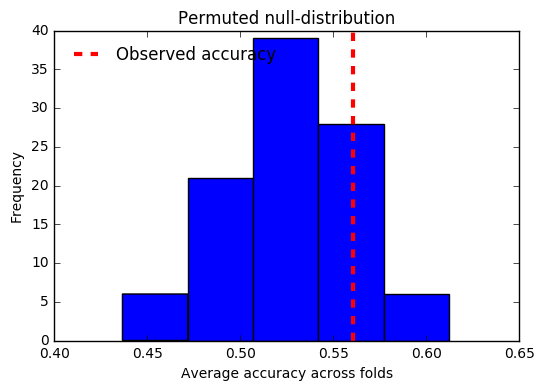

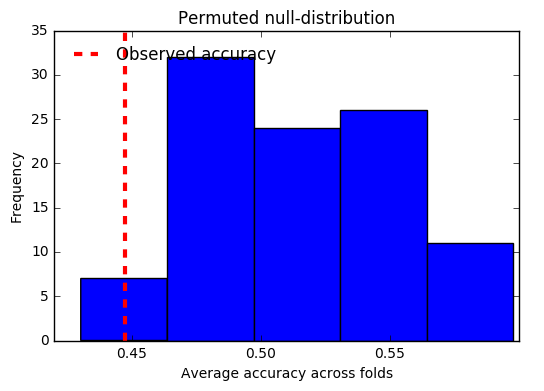

In [40]:
#Plot working memory permuted null-distribution...
plt.title('Permuted null-distribution')
plt.hist(permuted_accuracies_wm, bins=5)
plt.xlabel('Average accuracy across folds')
plt.ylabel('Frequency')
plt.axvline(observed_acc_wm, c='r', linestyle='dashed', linewidth=3)
plt.legend(['Observed accuracy'], loc=2, frameon=False)
plt.show()

#...and stroop null-distribution
plt.title('Permuted null-distribution')
plt.hist(permuted_accuracies_str, bins=5)
plt.xlabel('Average accuracy across folds')
plt.ylabel('Frequency')
plt.axvline(observed_acc_str, c='r', linestyle='dashed', linewidth=3)
plt.legend(['Observed accuracy'], loc=2, frameon=False)
plt.show()

Here, the corresponding non-parametric p-value is obtained:

In [37]:
bools_wm = permuted_accuracies_wm > observed_acc_wm
p_wm = sum(bools_wm.astype(int)) / float(len(permuted_accuracies_wm))

bools_str = permuted_accuracies_str > observed_acc_str
p_str = sum(bools_str.astype(int)) / float(len(permuted_accuracies_str))

print ('The p-value corresponding to working memory is %s' %p_wm)
print ('The p-value corresponding to stroop is %s' %p_str)

The p-value corresponding to working memory is 0.18
The p-value corresponding to stroop is 0.97


<div class='alert alert-info'>
**Feedback**: Hmm, that's unfortunate. I don't think that many more permutations is going to make a difference. 
</div>

## Discussion and conclusion

The p-value is a representation of the amount of accuracies that are higher than the observed accuracy after 100 permutations. More specific, the p-value is the sum of this number divided by total permutations. A p-value of .18 for Working Memory data (56% accurcay) and p = .97 for the Stroop Task data (45% accuracy) were found. These results (after 100 permutations) indicate that the algorithm is not able to significantly predict high of low fluid intelligence above chance level from both the working memory data and the cognitive control task. 

This indicates that the brain activation patterns for selective attention/cognitive control and patterns of the working memory tasks are not similar and informative enough to predict a high or a low score on a test for fluid intelligence. Even though behavioral data may show a connection between the three constructs (working memory, cognitive control and fluid intelligence), this paradigm was not sensitive enough to detect similar connections in brain activity. So, given our results, the null-hypothesis that brain activation patterns for cognitive control and working memory tasks are not similar and informative enough to predict a high or a low score on a test for fluid intelligence cannot be rejected.

Some possible confounds are summarized below:

To find the measure of cognitive control, we used the contrast incongruent vs congruent. This way it was possible to find the voxel activation difference when more cognitive control was necessary, in comparison to when this was less necessary. To get a better measure of cognitive control, an error vs correct response contrast could be used. This would be a more accurate depiction of the use of cognitive control.

As mentioned before the amount of permutations for the null-hypothesis distribution was rather low. An increase in this number could result in a better representation of the distribution and possibly lower the p-value. However, this difference is not to be expected to be big enough to matter for our conclusion.

Lastly, the select-k-best feature selector was set to select only a thousand voxels. Because no mask was used and the selector could pick voxels across the entire brain this number of voxels is rather low. A bigger number of features could possibly contain more and more valuable information for the decoding algorithm to use. However, as mentioned before time was short and increasing this number would also greatly increase the duration of the analysis.

<div class='alert alert-info'>
**Feedback**: Well summarized. I like your suggestion on using the correct-incorrect contrast when defining the gstroop features. Could, indeed, way more sensitive (and sensible) to use in this cross-decoding paradigm.
</div>

## literature
* Conway, A. R., Cowan, N., Bunting, M. F., Therriault, D. J., & Minkoff, S. R. (2002). A latent variable analysis of working memory capacity, short-term memory capacity, processing speed, and general fluid intelligence. Intelligence, 30(2), 163-183.
* Engle, R. W., Tuholski, S. W., Laughlin, J. E., & Conway, A. R. (1999). Working memory, short-term memory, and general fluid intelligence: a latent-variable approach. Journal of experimental psychology: General, 128(3), 309.
* Fry, A. F., & Hale, S. (1996). Processing speed, working memory, and fluid intelligence: Evidence for a developmental cascade. Psychological science, 7(4), 237-241.
* Jaeggi, S. M., Buschkuehl, M., Jonides, J., & Perrig, W. J. (2008). Improving fluid intelligence with training on working memory. Proceedings of the National Academy of Sciences, 105(19), 6829-6833.
* Kane, M. J., Hambrick, D. Z., & Conway, A. R. (2005). Working memory capacity and fluid intelligence are strongly related constructs: comment on Ackerman, Beier, and Boyle (2005).
* Kane, M. J., & Engle, R. W. (2002). The role of prefrontal cortex in working-memory capacity, executive attention, and general fluid intelligence: An individual-differences perspective. Psychonomic bulletin & review, 9(4), 637-671.
* Kane, M. J., & Engle, R. W. (2003). Working-memory capacity and the control of attention: the contributions of goal neglect, response competition, and task set to Stroop interference. Journal of experimental psychology: General, 132(1), 47.
* Klingberg, T., Forssberg, H., & Westerberg, H. (2002). Training of working memory in children with ADHD. Journal of clinical and experimental neuropsychology, 24(6), 781-791.
* Phillips, L. H., Channon, S., Tunstall, M., Hedenstrom, A., & Lyons, K. (2008). The role of working memory in decoding emotions. Emotion, 8(2), 184.
